#Simple Moving Average Strategy#

A moving average is a line used on charts to show the average price of a certain number of days back. The simple moving average, which is the easiest to calculate, is simply the sum of the past X number of prices divided by the total number of prices in the series.

The SMA is applied to your chart and helps to smooth out the price action that has occurred over the period you have chosen.

The moving average is a mathematical calculation of past price and is a lagging indicator – which means it lags the present day price.

Trend direction is the common use of a SMA and there are several that are most commonly used by traders:

- 10 SMA is will react to price movements quicker due to the short look back period of 10.  This may interest shorter term swing traders or day traders.
- 20 SMA is often used for the shorter term overall trend direction.
- 50 SMA is looked at as an intermediate trend direction.
- 100 and 200 simple moving averages are longer term trend direction indicators for trend following traders.

If the average price of the SMA is increasing, we will see the line turned to the upside indicating an uptrend

A decreasing SMA will generally point to a down trending market.

###Tesla 20 and 50 day moving average###

Here we will plot the 20 day and 50 day moving averages of Tesla and Apple stocks over a period of 2 years starting from January 2018 and December 2019. Combining short term and long term averages is a strategy many traders use and is known as Moving Average Crossover Strategy.

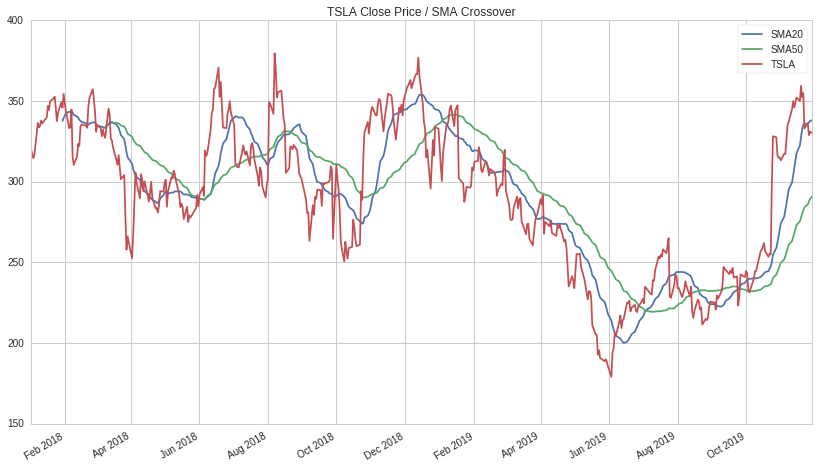

In [3]:
# Research environment functions
from quantopian.research import prices, symbols

# Pandas library: https://pandas.pydata.org/
import pandas as pd

# Query historical pricing data for AAPL
tsla_close = prices(
    assets=symbols('TSLA'),
    start='2018-01-01',
    end='2019-12-01',
)

# Compute 20 and 50 day moving averages on
# AAPL's pricing data
tsla_sma20 = tsla_close.rolling(20).mean()
tsla_sma50 = tsla_close.rolling(50).mean()

# Combine results into a pandas DataFrame and plot
pd.DataFrame({   
    'TSLA': tsla_close,
    'SMA20': tsla_sma20,
    'SMA50': tsla_sma50
}).plot(
    title='TSLA Close Price / SMA Crossover'
);

The moving average crossover strategy can be used as a buy and sell signal for stocks. The crossover trading strategy will look something like this:  
- The short term SMA crossing the long term SMA to the upside is a bullish sign.
- When the short term crosses over to the downside, we are bearish and only looking for a sell signal.
- We want pullbacks to at least have a close into the space between the two moving averages to give us potential buy and sell signals.

###Apple 20 and 50 day moving average###

Similarly, the below cells plot Simple 20 and 50 day moving averages for Apple Stocks for a period of two years staritng from January 2018 to January 2020. The same moving average crossover strategy defined above can be used for short term and intermediate term trading.

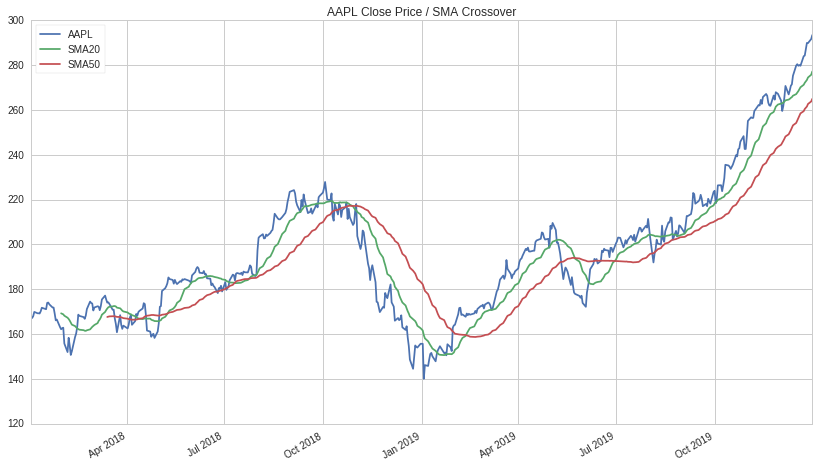

In [6]:
# Research environment functions
from quantopian.research import prices, symbols

# Pandas library: https://pandas.pydata.org/
import pandas as pd

# Query historical pricing data for AAPL
aapl_close = prices(
    assets=symbols('AAPL'),
    start='2018-01-01',
    end='2020-01-01',
)

# Compute 20 and 50 day moving averages on
# AAPL's pricing data
aapl_sma20 = aapl_close.rolling(20).mean()
aapl_sma50 = aapl_close.rolling(50).mean()

# Combine results into a pandas DataFrame and plot
pd.DataFrame({   
    'AAPL': aapl_close,
    'SMA20': aapl_sma20,
    'SMA50': aapl_sma50
}).plot(
    title='AAPL Close Price / SMA Crossover'
);

Although the moving average strategy is widely used by day traders and is one of the most common trading strategies, it does have some drawbacks.
It does not help predicting the future trends and prices of the underlying assets. Therefore, it can be concluded that Simple Moving Averge(SMA) is good for detecting buy and sell signals but bad for fututres trading. The SMA’s weakness is that it is slower to respond to rapid price changes that often occur at market reversal points. The SMA is often favored by traders or analysts operating on longer time frames, such as daily or weekly charts.

#Analysing Sentiment and Forging a Trading Strategy

When exploring a dataset, we try to look for patterns that might serve as the basis for a trading strategy. For example, the below plot shows some matching spikes between daily returns and stocktwits message volume, and in some cases the direction of the spikes in returns match the direction of AAPL's sentiment score. This looks interesting enough that we should conduct more rigorous statistical tests to confirm our hypotheses. 

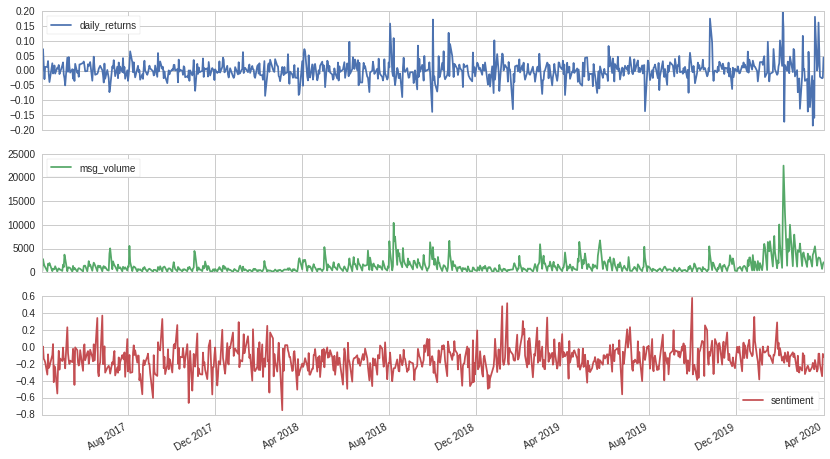

In [5]:
# Pipeline imports
from quantopian.research import run_pipeline
from quantopian.pipeline import Pipeline
from quantopian.pipeline.factors import Returns
from quantopian.pipeline.data.psychsignal import stocktwits

# Pipeline definition
def make_pipeline():

    returns = Returns(window_length=2)
    sentiment = stocktwits.bull_minus_bear.latest
    msg_volume = stocktwits.total_scanned_messages.latest

    return Pipeline(
        columns={
            'daily_returns': returns,
            'sentiment': sentiment,
            'msg_volume': msg_volume,
        },
    )

# Pipeline execution
data_output = run_pipeline(
    make_pipeline(),
    start_date=period_start,
    end_date=period_end
)

# Filter results for AAPL
aapl_output = data_output.xs(
    symbols('TSLA'),
    level=1
)

# Plot results for AAPL
aapl_output.plot(subplots=True);

Since there seems to be a correlation between daily returns, message volume and the underlying stock sentiment, the next chapter deals with creating a trading strategy using public sentiment as a technical indicator.